In [2]:
%run ./prelude.py --style=uncompressed --animation=movie

interactive(children=(Dropdown(description='style', options=('tree', 'uncompressed', 'tree+uncompressed'), val…

Button(description='Run all cells below', style=ButtonStyle())

Matrix Multiply
Output - before


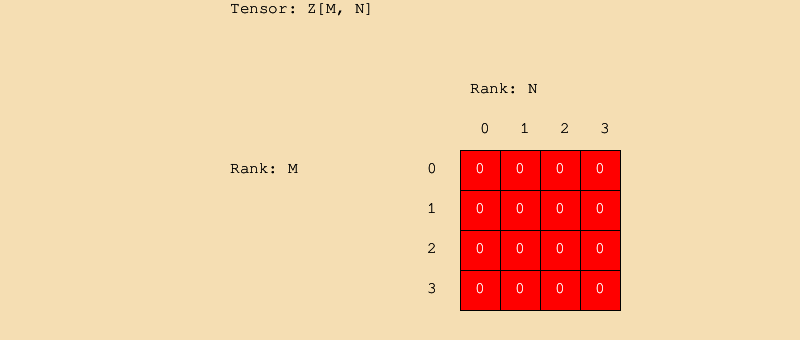

Output - after


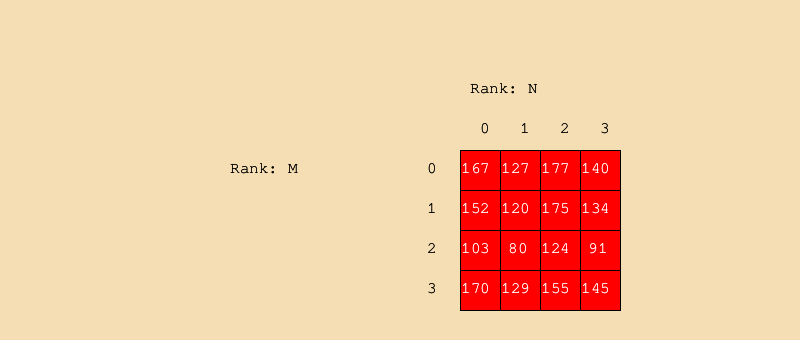

Create individual tensor images for each cycle: 0it [00:00, ?it/s]

Paste individual tensor images into frame for each cycle:   0%|          | 0/66 [00:00<?, ?it/s]

Render video frame for each cycle:   0%|          | 0/66 [00:00<?, ?it/s]

In [5]:
M1 = 2
M0 = 2
K1 = 2
K0 = 2
N1 = 2
N0 = 2
M = 4
M1 = M // M0
K = 4
K1 = K // K0
N = 4
N1 = N // N0

def create_z():
    """
    Create a fully populated z tensor
    """
    z = Tensor(rank_ids=["M", "N"], default='')
    z.setName("Z")
    z.setMutable(True)

    z_m = z.getRoot()
    #
    # Hack to fill in all the entries in z
    # This allows us to pretend the tensor is dense
    #
    n_fiber = Fiber(coords=range(N), initial=1)
    m_fiber = Fiber(coords=range(M), initial=1)

    for m, (z_n, _) in z_m << m_fiber:
        for n, (z_ref, _) in z_n << n_fiber:
            z_ref <<= 0
            
    return z

print("Matrix Multiply")
a_MK_raw = []
for m in range(M):
    a_MK_raw.append([random.randint(1, 9) for i in range(K)])
                 
b_KN_raw = []
for k in range(K):
    b_KN_raw.append([random.randint(1, 9) for i in range(N)])

a_MK = Tensor.fromUncompressed(["M", "K"], a_MK_raw)
b_KN = Tensor.fromUncompressed(["K", "N"], b_KN_raw)

a_MK.setName("A_MK").setColor("blue")
b_KN.setName("B_KN").setColor("green")

z_MN = create_z()

print("Output - before")
displayTensor(z_MN)

z = z_MN.getRoot()
a = a_MK.getRoot()
b = b_KN.getRoot()

canvas = createCanvas(a_MK, b_KN, z_MN)
for m in range(M):
    a_tile = [ (m, kt) for kt in range(K)]
    for n in range(N):
        b_tile = [ (kt, n) for kt in range(K)]
        z_tile = (m, n)
        for k in range(K):
            
            z[m][n] += a[m][k] * b[k][n]
            addActivity(canvas, a_tile, b_tile, z_tile, worker="W")
            addFrame(canvas, (m,k), (k,n), (m,n))
            

print("Output - after")
displayTensor(z)

displayCanvas(canvas)
    